# Dataset & Library Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loc1 = "/content/drive/MyDrive/443 Project/GSE118553_expression_filtered.csv"
loc2 = "/content/drive/MyDrive/443 Project/alz_metadata_final.csv"

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [ ]:
# Load gene expression data
try:
    expression_data = pd.read_csv(loc1, index_col=0)
    print(f"✓ Gene expression data loaded: {expression_data.shape}")
    print(f"  - Genes: {expression_data.shape[0]}")
    print(f"  - Samples: {expression_data.shape[1]}")
except FileNotFoundError:
    print("❌ Gene expression file not found. Please check the path.")
    print("Make sure the file is uploaded to:", loc1)

✓ Gene expression data loaded: (35492, 401)
  - Genes: 35492
  - Samples: 401


In [ ]:
# Load metadata
try:
    metadata = pd.read_csv(loc2)
    print(f"✓ Metadata loaded: {metadata.shape}")
    print(f"  - Samples: {metadata.shape[0]}")
    print(f"  - Features: {metadata.shape[1]}")
except FileNotFoundError:
    print("❌ Metadata file not found. Please check the path.")
    print("Make sure the file is uploaded to:", loc2)

✓ Metadata loaded: (401, 6)
  - Samples: 401
  - Features: 6


# DATA EXPLORATION

In [ ]:
# Display basic info about expression data
print("\nGENE EXPRESSION DATA:")
print(f"Shape: {expression_data.shape}")
print(f"Data type: {expression_data.dtypes.value_counts()}")
print(f"Missing values: {expression_data.isnull().sum().sum()}")


GENE EXPRESSION DATA:
Shape: (35492, 401)
Data type: float64    401
Name: count, dtype: int64
Missing values: 0


In [ ]:
# Check first few rows and columns
print("\nFirst 5 genes and 10 samples:")
print(expression_data.iloc[:5, :10])


First 5 genes and 10 samples:
              GSM3332689  GSM3332690  GSM3332691  GSM3332692  GSM3332693  \
ID_REF                                                                     
ILMN_1651199    4.334583    4.669481    4.019831    2.683982    3.989454   
ILMN_1651209    5.060306    5.445081    4.725558    4.708424    4.139755   
ILMN_1651210    2.871163    3.996106    3.892652    2.991609    3.656555   
ILMN_1651221    3.395205    3.798609    3.650064    4.124032    3.634799   
ILMN_1651230    3.444668    2.340506    2.431752    2.854460    2.581822   

              GSM3332694  GSM3332695  GSM3332696  GSM3332697  GSM3332698  
ID_REF                                                                    
ILMN_1651199    4.054344    3.904420    4.737196    4.677241    4.202074  
ILMN_1651209    5.342804    4.858169    5.728795    5.225690    4.928338  
ILMN_1651210    3.953355    4.293798    3.652577    4.216502    3.390649  
ILMN_1651221    3.486408    3.936366    3.642884    3.860622 

In [ ]:
# Expression data statistics
print("\nEXPRESSION DATA STATISTICS:")
print(expression_data.describe().iloc[:, :5])


EXPRESSION DATA STATISTICS:
         GSM3332689    GSM3332690    GSM3332691    GSM3332692    GSM3332693
count  35492.000000  35492.000000  35492.000000  35492.000000  35492.000000
mean       3.793893      3.809405      3.795018      3.781085      3.804474
std        1.152137      1.144867      1.188852      1.183931      1.250180
min        1.243166      1.052248      1.252975      1.126797      1.017869
25%        2.957845      3.005647      2.940591      2.942571      2.923165
50%        3.587244      3.598547      3.546999      3.544603      3.536732
75%        4.439775      4.436781      4.436916      4.408929      4.477463
max       10.351128     10.686331     10.274257      9.740528     10.362109


In [ ]:
# Metadata exploration
print("\nMETADATA INFORMATION:")
print(f"Shape: {metadata.shape}")
print(f"Columns: {list(metadata.columns)}")
print("\nFirst 10 rows:")
print(metadata.head(10))


METADATA INFORMATION:
Shape: (401, 6)
Columns: ['GSM', 'gender', 'age', 'individual', 'tissue', 'disease state']

First 10 rows:
          GSM  gender   age  individual             tissue disease state
0  GSM3332689  FEMALE  84.0  Subject  1    Temporal_Cortex            AD
1  GSM3332690  FEMALE  84.0  Subject  1         Cerebellum            AD
2  GSM3332691  FEMALE  84.0  Subject  1     Frontal_Cortex            AD
3  GSM3332692  FEMALE  84.0  Subject  1  Entorhinal_Cortex            AD
4  GSM3332693  FEMALE  82.0  Subject  2    Temporal_Cortex       control
5  GSM3332694  FEMALE  82.0  Subject  2     Frontal_Cortex       control
6  GSM3332695  FEMALE  51.0  Subject  3  Entorhinal_Cortex       control
7  GSM3332696  FEMALE  51.0  Subject  3         Cerebellum       control
8  GSM3332697  FEMALE  51.0  Subject  3    Temporal_Cortex       control
9  GSM3332698  FEMALE  51.0  Subject  3  Entorhinal_Cortex       control


In [ ]:
# Check metadata distributions
print("\nMETADATA DISTRIBUTIONS:")
for col in metadata.columns:
    if metadata[col].dtype == 'object' or metadata[col].nunique() < 20:
        print(f"\n{col}:")
        print(metadata[col].value_counts())


METADATA DISTRIBUTIONS:

GSM:
GSM
GSM3333089    1
GSM3333073    1
GSM3333072    1
GSM3333071    1
GSM3333070    1
             ..
GSM3332694    1
GSM3332693    1
GSM3332692    1
GSM3332691    1
GSM3332690    1
Name: count, Length: 401, dtype: int64

gender:
gender
FEMALE    237
MALE      164
Name: count, dtype: int64

individual:
individual
Subject  5      6
Subject  15     6
Subject  41     6
Subject  72     6
Subject  12     5
               ..
Subject  38     1
Subject  35     1
Subject  61     1
Subject  71     1
Subject  109    1
Name: count, Length: 112, dtype: int64

tissue:
tissue
Temporal_Cortex      115
Entorhinal_Cortex     98
Frontal_Cortex        96
Cerebellum            92
Name: count, dtype: int64

disease state:
disease state
AD         167
AsymAD     134
control    100
Name: count, dtype: int64


In [ ]:
# Data alignment check
print("\nDATA ALIGNMENT CHECK:")
expression_samples = set(expression_data.columns)
metadata_samples = set(metadata['GSM'])

print(f"Expression samples: {len(expression_samples)}")
print(f"Metadata samples: {len(metadata_samples)}")
print(f"Common samples: {len(expression_samples.intersection(metadata_samples))}")
print(f"Expression only: {len(expression_samples - metadata_samples)}")
print(f"Metadata only: {len(metadata_samples - expression_samples)}")


DATA ALIGNMENT CHECK:
Expression samples: 401
Metadata samples: 401
Common samples: 401
Expression only: 0
Metadata only: 0


# DATA PREPROCESSING

In [ ]:
# Align data - keep only common samples
common_samples = list(expression_samples.intersection(metadata_samples))
print(f"\nUsing {len(common_samples)} common samples")


Using 401 common samples


In [ ]:
# Filter expression data
expression_filtered = expression_data[common_samples].copy()

# Filter and sort metadata
metadata_filtered = metadata[metadata['GSM'].isin(common_samples)].copy()
metadata_filtered = metadata_filtered.set_index('GSM').loc[common_samples].reset_index()

print(f"Filtered expression data: {expression_filtered.shape}")
print(f"Filtered metadata: {metadata_filtered.shape}")

Filtered expression data: (35492, 401)
Filtered metadata: (401, 6)


In [ ]:
# Handle missing values in metadata
print("\nHANDLING MISSING VALUES:")
print("Missing values per column:")
missing_counts = metadata_filtered.isnull().sum()
print(missing_counts[missing_counts > 0])


HANDLING MISSING VALUES:
Missing values per column:
age    2
dtype: int64


In [ ]:
# Fill missing ages with median (if any)
if 'age' in metadata_filtered.columns:
    if metadata_filtered['age'].isnull().sum() > 0:
        median_age = metadata_filtered['age'].median()
        metadata_filtered['age'].fillna(median_age, inplace=True)
        print(f"Filled missing ages with median: {median_age}")

Filled missing ages with median: 84.0


In [ ]:
# Check for low-variance genes (optional filtering)
print("\n GENE FILTERING:")
gene_variance = expression_filtered.var(axis=1)
print(f"Gene variance statistics:")
print(gene_variance.describe())


 GENE FILTERING:
Gene variance statistics:
count    35492.000000
mean         0.196633
std          0.152334
min          0.108359
25%          0.129590
50%          0.152916
75%          0.202834
max          3.984871
dtype: float64


In [ ]:
# Remove genes with very low variance (bottom 10%)
variance_threshold = gene_variance.quantile(0.1)
high_var_genes = gene_variance[gene_variance > variance_threshold].index
expression_filtered = expression_filtered.loc[high_var_genes]

print(f"Kept {len(high_var_genes)} genes after variance filtering")
print(f"Final expression data shape: {expression_filtered.shape}")

Kept 31942 genes after variance filtering
Final expression data shape: (31942, 401)


# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Set up plotting
fig_count = 1

Text(0.5, 1.0, 'Sample Distribution by Disease State')

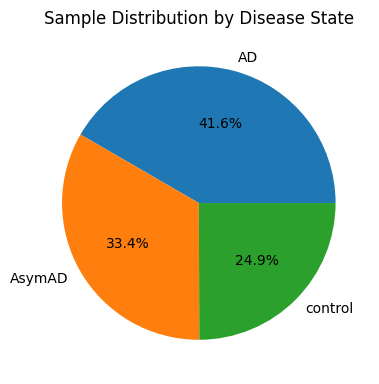

In [ ]:
# 1. Sample distribution by disease state
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
disease_counts = metadata_filtered['disease state'].value_counts()
plt.pie(disease_counts.values, labels=disease_counts.index, autopct='%1.1f%%')
plt.title('Sample Distribution by Disease State')

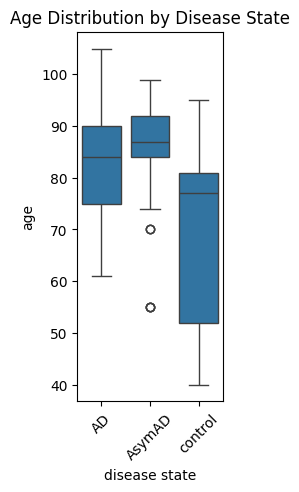

In [ ]:
# 2. Age distribution by disease state
plt.subplot(1, 3, 2)
if 'age' in metadata_filtered.columns:
    sns.boxplot(data=metadata_filtered, x='disease state', y='age')
    plt.xticks(rotation=45)
    plt.title('Age Distribution by Disease State')

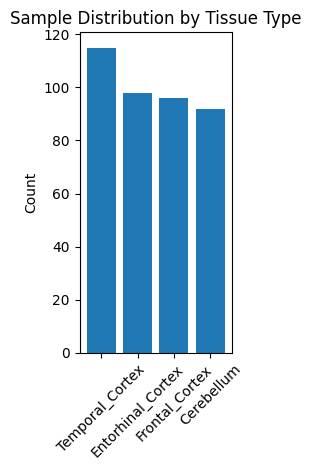

In [ ]:
# 3. Tissue distribution
plt.subplot(1, 3, 3)
tissue_counts = metadata_filtered['tissue'].value_counts()
plt.bar(range(len(tissue_counts)), tissue_counts.values)
plt.xticks(range(len(tissue_counts)), tissue_counts.index, rotation=45)
plt.title('Sample Distribution by Tissue Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

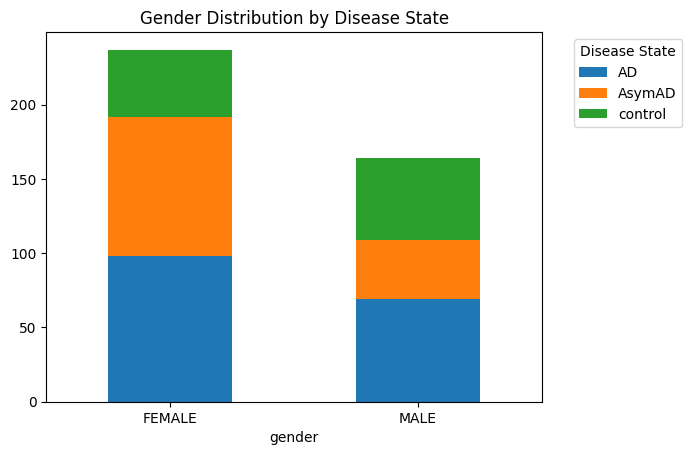

In [ ]:
# 4. Gender distribution
plt.figure(figsize=(12, 4))

gender_disease = pd.crosstab(metadata_filtered['gender'], metadata_filtered['disease state'])
gender_disease.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Disease State')
plt.xticks(rotation=0)
plt.legend(title='Disease State', bbox_to_anchor=(1.05, 1), loc='upper left')

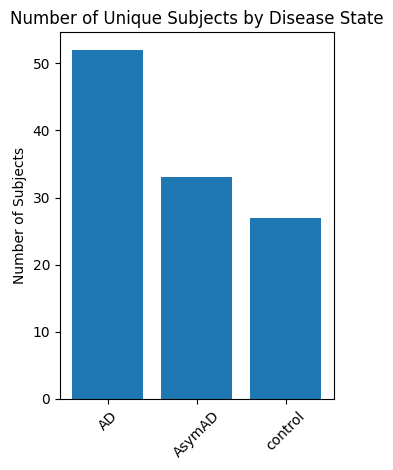

In [ ]:
# 5. Subject count by disease state
plt.subplot(1, 2, 2)
subject_counts = metadata_filtered.groupby('disease state')['individual'].nunique()
plt.bar(subject_counts.index, subject_counts.values)
plt.title('Number of Unique Subjects by Disease State')
plt.xticks(rotation=45)
plt.ylabel('Number of Subjects')

plt.tight_layout()

Text(0, 0.5, 'Frequency')

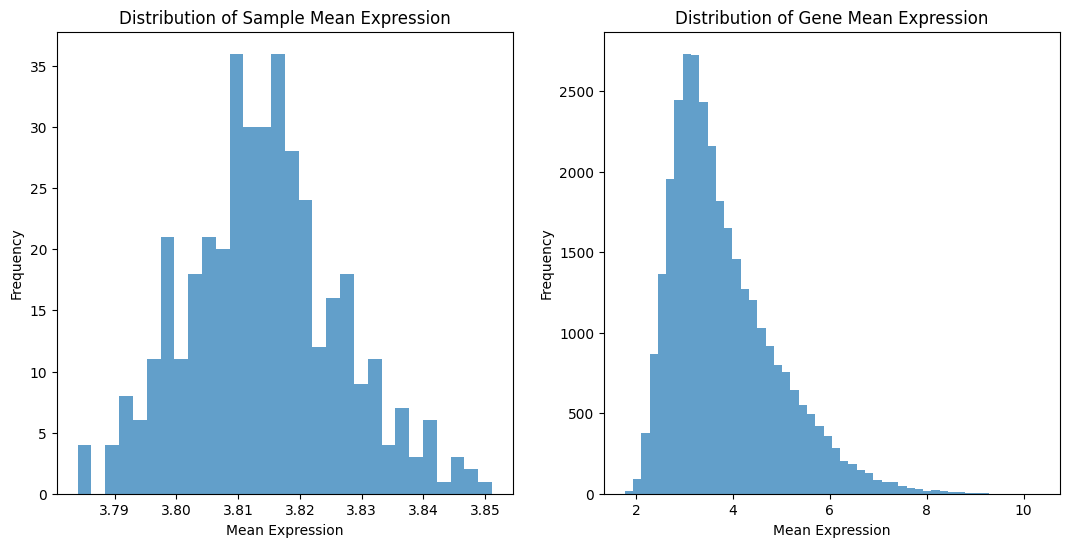

In [ ]:
plt.figure(figsize=(20, 6))
# Sample expression distributions
plt.subplot(1, 3, 1)
sample_means = expression_filtered.mean(axis=0)
plt.hist(sample_means, bins=30, alpha=0.7)
plt.title('Distribution of Sample Mean Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')

# Gene expression distributions
plt.subplot(1, 3, 2)
gene_means = expression_filtered.mean(axis=1)
plt.hist(gene_means, bins=50, alpha=0.7)
plt.title('Distribution of Gene Mean Expression')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')

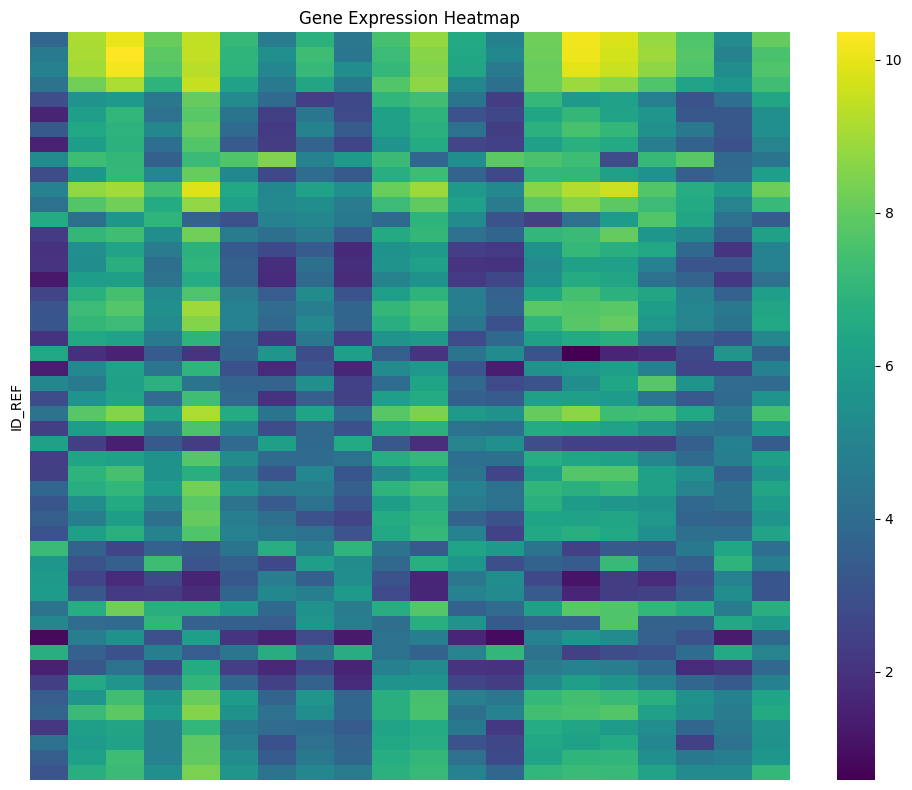

In [ ]:
#Separate larger heatmap
plt.figure(figsize=(10, 8))
top_var_genes = gene_variance.nlargest(50).index
sample_columns = expression_filtered.columns[:20]
sample_data = expression_filtered.loc[top_var_genes, sample_columns]
sns.heatmap(sample_data, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Gene Expression Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
print("Computing sample correlations...")
sample_corr = expression_filtered.T.corr()

Computing sample correlations...


In [ ]:
top_genes_for_corr = gene_variance.nlargest(5000).index
expression_subset = expression_filtered.loc[top_genes_for_corr]
sample_corr = expression_subset.T.corr()

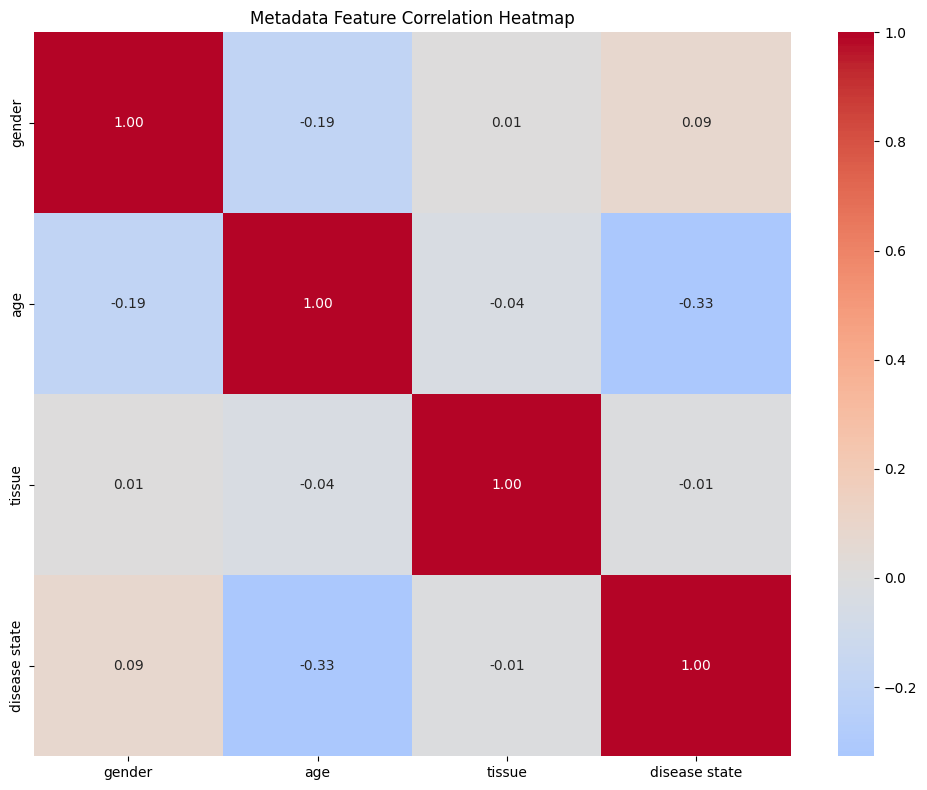

In [ ]:
# Correlation heatmap for metadata (numerical and encoded categorical columns)
plt.figure(figsize=(10, 8))
metadata_for_corr = metadata_filtered.drop(['GSM', 'individual'], axis=1).copy()

for col in ['gender', 'tissue', 'disease state']:
    if col in metadata_for_corr.columns:
        le = LabelEncoder()
        metadata_for_corr[col] = le.fit_transform(metadata_for_corr[col])

metadata_corr = metadata_for_corr.corr()
sns.heatmap(metadata_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Metadata Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

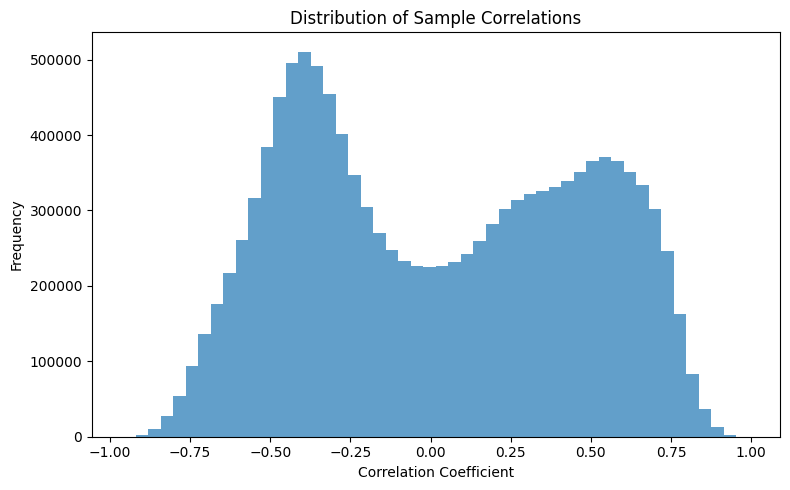

Mean sample correlation: 0.025
Median sample correlation: 0.001


In [ ]:
plt.figure(figsize=(8, 5))
# Correlation distribution
corr_values = sample_corr.values[np.triu_indices_from(sample_corr.values, k=1)]
plt.hist(corr_values, bins=50, alpha=0.7)
plt.title('Distribution of Sample Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Mean sample correlation: {np.mean(corr_values):.3f}")
print(f"Median sample correlation: {np.median(corr_values):.3f}")

# DIFFERENTIAL EXPRESSION ANALYSIS

In [ ]:
# Create disease state mapping
disease_map = {'control': 0, 'AD': 1, 'AsymAD': 2}
metadata_filtered['disease_numeric'] = metadata_filtered['disease state'].map(disease_map)

# Compare AD vs Control
ad_samples = metadata_filtered[metadata_filtered['disease state'] == 'AD']['GSM'].values
control_samples = metadata_filtered[metadata_filtered['disease state'] == 'control']['GSM'].values

print(f"AD samples: {len(ad_samples)}")
print(f"Control samples: {len(control_samples)}")

AD samples: 167
Control samples: 100


In [ ]:
# Perform t-tests for each gene
de_results = []

for gene in expression_filtered.index:
    ad_expr = expression_filtered.loc[gene, ad_samples]
    control_expr = expression_filtered.loc[gene, control_samples]

    # T-test
    t_stat, p_val = ttest_ind(ad_expr, control_expr)

    # Calculate fold change (log2)
    mean_ad = np.mean(ad_expr)
    mean_control = np.mean(control_expr)
    log2_fc = np.log2(mean_ad + 1e-10) - np.log2(mean_control + 1e-10)

    de_results.append({
        'gene': gene,
        'mean_AD': mean_ad,
        'mean_control': mean_control,
        'log2_fold_change': log2_fc,
        't_statistic': t_stat,
        'p_value': p_val
    })

# Create DataFrame and adjust p-values
de_df = pd.DataFrame(de_results)
de_df['p_adjusted'] = multipletests(de_df['p_value'], method='fdr_bh')[1]

# Define significance criteria
de_df['significant'] = (de_df['p_adjusted'] < 0.05) & (np.abs(de_df['log2_fold_change']) > 0.5)

print(f"Differential expression analysis completed")
print(f"Significant genes (FDR < 0.05, |log2FC| > 0.5): {de_df['significant'].sum()}")

Differential expression analysis completed
Significant genes (FDR < 0.05, |log2FC| > 0.5): 0


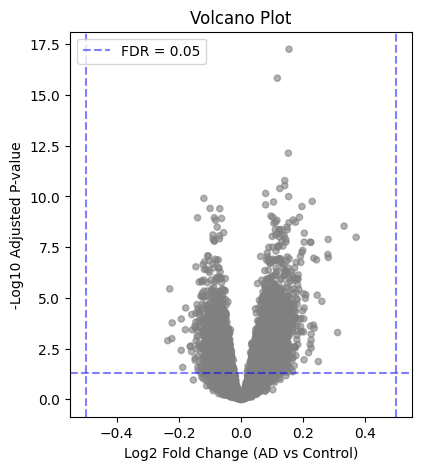

In [ ]:
plt.figure(figsize=(15, 5))

# Volcano plot
plt.subplot(1, 3, 1)
x = de_df['log2_fold_change']
y = -np.log10(de_df['p_adjusted'])

# Color points by significance
colors = ['red' if sig else 'gray' for sig in de_df['significant']]
plt.scatter(x, y, c=colors, alpha=0.6, s=20)

plt.axhline(y=-np.log10(0.05), color='blue', linestyle='--', alpha=0.5, label='FDR = 0.05')
plt.axvline(x=0.5, color='blue', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Log2 Fold Change (AD vs Control)')
plt.ylabel('-Log10 Adjusted P-value')
plt.title('Volcano Plot')
plt.legend()

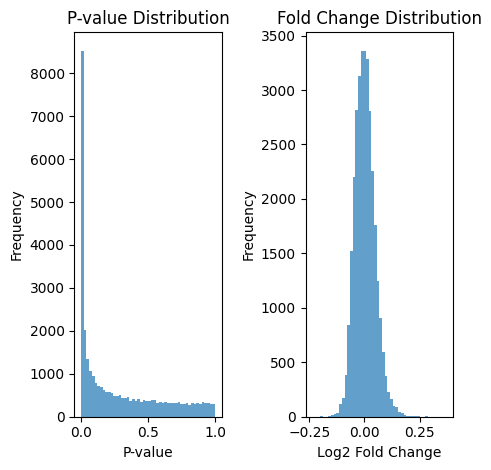

In [ ]:
# P-value distribution
plt.subplot(1, 3, 2)
plt.hist(de_df['p_value'], bins=50, alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('P-value Distribution')

# Fold change distribution
plt.subplot(1, 3, 3)
plt.hist(de_df['log2_fold_change'], bins=50, alpha=0.7)
plt.xlabel('Log2 Fold Change')
plt.ylabel('Frequency')
plt.title('Fold Change Distribution')

plt.tight_layout()
plt.show()

# PRINCIPAL COMPONENT ANALYSIS (PCA)

In [ ]:
print("Performing PCA...")
expression_scaled = StandardScaler().fit_transform(expression_filtered.T)

Performing PCA...


In [ ]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(expression_scaled)

In [ ]:
# Calculate explained variance
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

print(f"✓ PCA completed")
print(f"PC1 explains {explained_var_ratio[0]:.1%} of variance")
print(f"PC2 explains {explained_var_ratio[1]:.1%} of variance")
print(f"First 10 PCs explain {cumulative_var[9]:.1%} of variance")

✓ PCA completed
PC1 explains 18.7% of variance
PC2 explains 7.3% of variance
First 10 PCs explain 39.6% of variance


Text(0.5, 1.0, 'Scree Plot (First 20 PCs)')

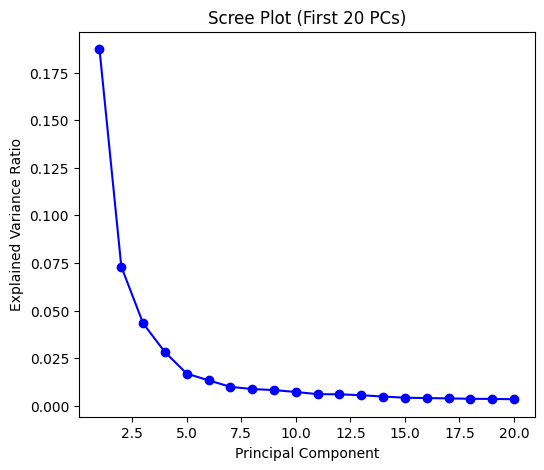

In [ ]:
# PCA visualization
plt.figure(figsize=(20, 5))

# Scree plot
plt.subplot(1, 3, 1)
plt.plot(range(1, 21), explained_var_ratio[:20], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 20 PCs)')

Text(0.5, 1.0, 'Cumulative Variance Explained')

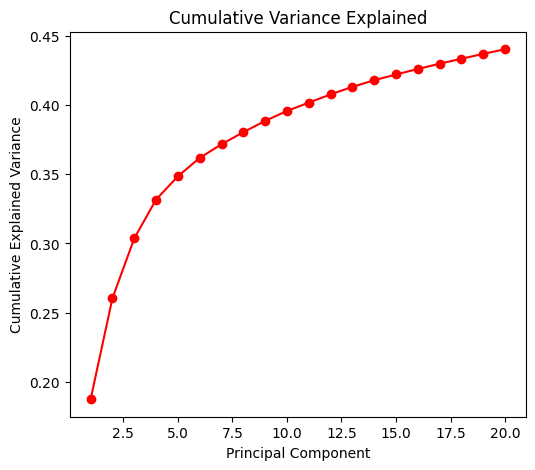

In [ ]:
# Cumulative variance
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 2)
plt.plot(range(1, 21), cumulative_var[:20], 'ro-')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')


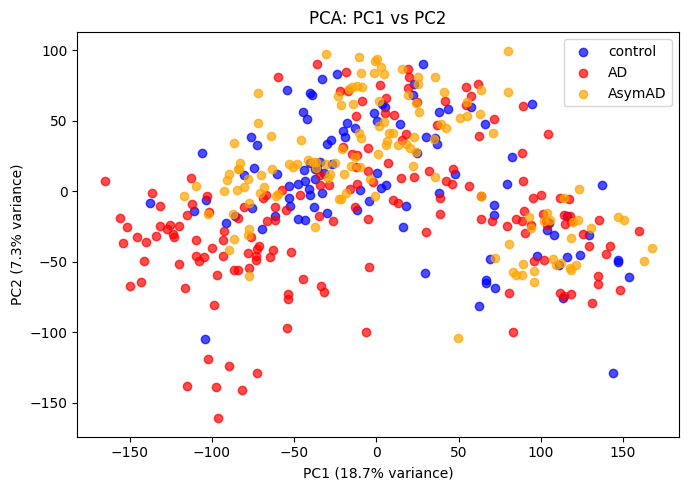

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
colors_dict = {'control': 'blue', 'AD': 'red', 'AsymAD': 'orange'}
for disease in colors_dict:
    mask = metadata_filtered['disease state'] == disease
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1],
               c=colors_dict[disease], label=disease, alpha=0.7)

plt.xlabel(f'PC1 ({explained_var_ratio[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_var_ratio[1]:.1%} variance)')
plt.title('PCA: PC1 vs PC2')
plt.legend()

plt.tight_layout()
plt.show()

# MACHINE LEARNING CLASSIFICATION

In [ ]:
# Binary classification: AD vs Control
metadata_aligned = metadata_filtered.set_index('GSM').loc[expression_filtered.T.index]

# Now create the binary mask from the aligned metadata
binary_mask = metadata_aligned['disease state'].isin(['AD', 'control'])

X = expression_filtered.T[binary_mask].values
y = (metadata_aligned[binary_mask]['disease state'] == 'AD').astype(int).values

print(f"Binary classification dataset prepared")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"AD samples: {y.sum()}, Control samples: {len(y) - y.sum()}")

Binary classification dataset prepared
Samples: 267, Features: 31942
AD samples: 167, Control samples: 100


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape[0]} samples")
print(f"Test set: {X_test_scaled.shape[0]} samples")

Training set: 186 samples
Test set: 81 samples


In [ ]:
# Feature selection
print("Performing feature selection...")
selector = SelectKBest(score_func=f_classif, k=1000)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

print(f"Selected {X_train_selected.shape[1]} features")

In [ ]:
# Train multiple classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

results = {}

print("\n🏃‍♂️ Training classifiers...")
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")

    # Train classifier
    clf.fit(X_train_selected, y_train)

    # Predictions
    y_pred = clf.predict(X_test_selected)
    y_pred_proba = clf.predict_proba(X_test_selected)[:, 1] if hasattr(clf, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'model': clf
    }

    # Format AUC string based on whether it's available
    auc_str = f"{auc:.3f}" if auc is not None else 'N/A'

    print(f"✓ {name} - Accuracy: {accuracy:.3f}, AUC: {auc_str}")


🏃‍♂️ Training classifiers...

Training Logistic Regression...
✓ Logistic Regression - Accuracy: 0.877, AUC: 0.969

Training Random Forest...
✓ Random Forest - Accuracy: 0.790, AUC: 0.878

Training SVM...
✓ SVM - Accuracy: 0.852, AUC: 0.935


In [ ]:
# Cross-validation
print("Performing cross-validation...")
cv_scores = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_selected, y_train, cv=cv, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} - CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

Performing cross-validation...
Logistic Regression - CV Accuracy: 0.973 ± 0.017
Random Forest - CV Accuracy: 0.887 ± 0.027
SVM - CV Accuracy: 0.930 ± 0.022


# MODEL EVALUATION AND VISUALIZATION

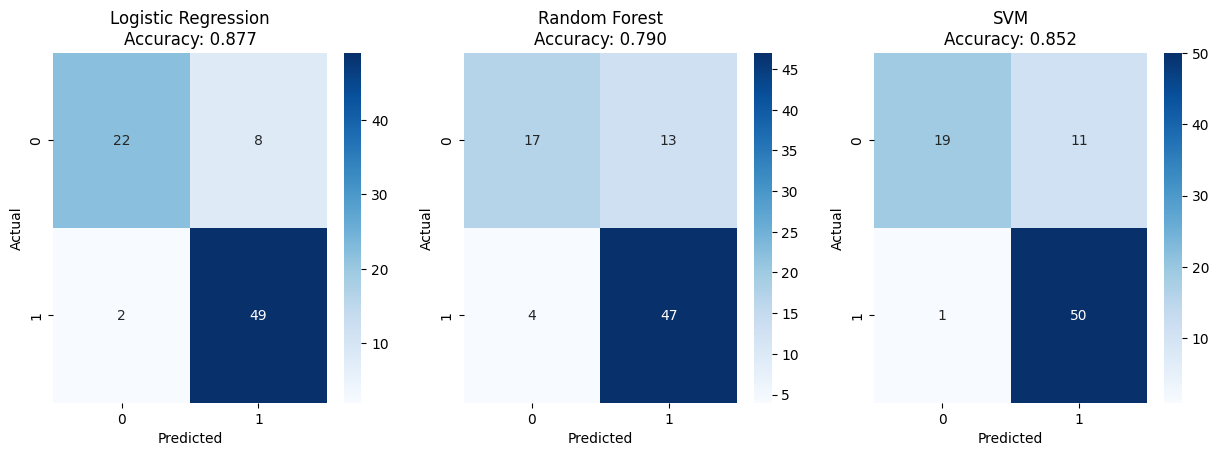

In [ ]:
plt.figure(figsize=(15, 10))
# Confusion matrices
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

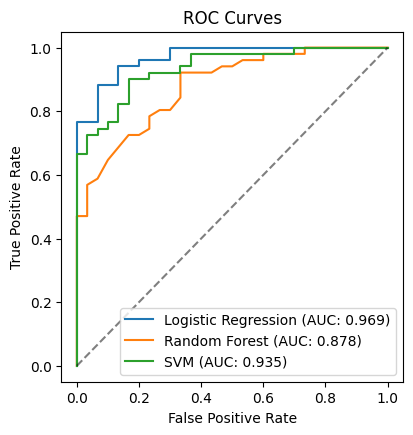

In [ ]:
# ROC curves
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
for name, result in results.items():
    if result['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        plt.plot(fpr, tpr, label=f'{name} (AUC: {result["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

([0, 1, 2],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'SVM')])

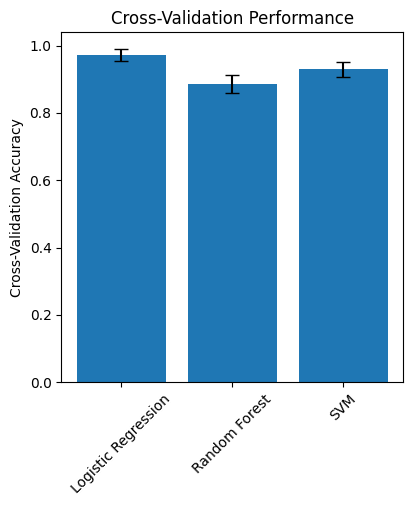

In [ ]:
# Cross-validation scores
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 5)
cv_names = list(cv_scores.keys())
cv_means = [scores.mean() for scores in cv_scores.values()]
cv_stds = [scores.std() for scores in cv_scores.values()]

plt.bar(cv_names, cv_means, yerr=cv_stds, capsize=5)
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Performance')
plt.xticks(rotation=45)

# SUMMARY AND RESULTS

In [ ]:
# Sort by log2 fold change to get top upregulated and downregulated genes
top_up = de_df.sort_values(by='log2_fold_change', ascending=False).head(1)
top_down = de_df.sort_values(by='log2_fold_change', ascending=True).head(1)

print(f"""
   DATASET OVERVIEW:
   • Gene expression samples: {expression_filtered.shape[1]}
   • Genes analyzed: {expression_filtered.shape[0]}
   • Disease groups: {metadata_filtered['disease state'].nunique()}
   • Tissues: {metadata_filtered['tissue'].nunique()}

   DIFFERENTIAL EXPRESSION:
   • Significant genes (FDR < 0.05, |log2FC| > 0.5): {de_df['significant'].sum()}
   • Most upregulated: {'N/A' if top_up.empty else f"{top_up.iloc[0]['gene']} (log2FC: {top_up.iloc[0]['log2_fold_change']:.2f})"}
   • Most downregulated: {'N/A' if top_down.empty else f"{top_down.iloc[0]['gene']} (log2FC: {top_down.iloc[0]['log2_fold_change']:.2f})"}

   PCA RESULTS:
   • PC1 variance explained: {explained_var_ratio[0]:.1%}
   • PC2 variance explained: {explained_var_ratio[1]:.1%}
   • Top 10 PCs explain: {cumulative_var[9]:.1%} of total variance

   MACHINE LEARNING:
   • Best classifier: {max(results.keys(), key=lambda x: results[x]['accuracy'])}
   • Best accuracy: {max(result['accuracy'] for result in results.values()):.3f}
   • Best AUC: {max(result['auc'] for result in results.values() if result['auc']):.3f}
""")


   DATASET OVERVIEW:
   • Gene expression samples: 401
   • Genes analyzed: 31942
   • Disease groups: 3
   • Tissues: 4

   DIFFERENTIAL EXPRESSION:
   • Significant genes (FDR < 0.05, |log2FC| > 0.5): 0
   • Most upregulated: ILMN_2250521 (log2FC: 0.37)
   • Most downregulated: ILMN_2081813 (log2FC: -0.24)

   PCA RESULTS:
   • PC1 variance explained: 18.7%
   • PC2 variance explained: 7.3%
   • Top 10 PCs explain: 39.6% of total variance

   MACHINE LEARNING:
   • Best classifier: Logistic Regression
   • Best accuracy: 0.877
   • Best AUC: 0.969

